<a href="https://colab.research.google.com/github/RochaErik/AlgorithmComparison/blob/main/AlgorithmComparison1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")

---

# **(Unbalanced) Wine Dataset**

---

In [9]:
wine_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Wine/wine.data', header=None)

In [10]:
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
wine_df.shape

(178, 14)

In [12]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    int64  
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    int64  
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
 13  13      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
wine_df.nunique()

0       3
1     126
2     133
3      79
4      63
5      53
6      97
7     132
8      39
9     101
10    132
11     78
12    122
13    121
dtype: int64

In [14]:
# Unbalanced dataset

wine_df[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [15]:
wine_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [16]:
X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

In [17]:
X.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [18]:
X.shape

(178, 13)

In [19]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 0, dtype: int64

In [20]:
y.shape

(178,)

In [21]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [23]:
names = [
          'AdaBoost',
          'GradBoost',
          'CatBoost',
          'LightGBM',
          'XGBoost'
        ]

classifiers = [
                AdaBoostClassifier(),
                GradientBoostingClassifier(),
                CatBoostClassifier(silent=True),
                LGBMClassifier(verbosity=-1),
                XGBClassifier()
              ]

In [24]:
rkf = RepeatedKFold(n_splits=10, n_repeats=10, random_state=42)

In [25]:
wine_scores = []
wine_scores_mean = []
wine_scores_std = []
model_names = []
execution_times = []

for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  wine_scores.append(results)
  wine_scores_mean.append(results.mean()*100)
  wine_scores_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Wine Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Wine Dataset ---------
[0.94444444 0.88888889 0.72222222 0.88888889 1.         0.94444444
 0.94444444 0.94444444 1.         0.76470588 0.94444444 0.83333333
 0.88888889 0.83333333 0.88888889 0.83333333 1.         0.83333333
 0.82352941 0.94117647 0.94444444 0.88888889 0.94444444 1.
 1.         0.66666667 0.94444444 0.88888889 0.88235294 0.76470588
 1.         1.         0.88888889 1.         0.88888889 1.
 1.         0.77777778 0.82352941 0.94117647 0.94444444 0.83333333
 1.         1.         0.94444444 0.94444444 0.83333333 0.83333333
 0.94117647 0.88235294 0.94444444 1.         0.94444444 0.88888889
 0.94444444 0.88888889 0.94444444 0.83333333 0.94117647 0.88235294
 1.         0.88888889 0.72222222 0.88888889 1.         0.94444444
 0.94444444 0.88888889 0.88235294 0.88235294 0.66666667 0.88888889
 0.88888889 0.77777778 0.77777778 1.         1.         0.72222222
 1.         0.88235294 0.88888889 0.88888889 1.         0.88888889
 0.94444444 0.72222222 1.        

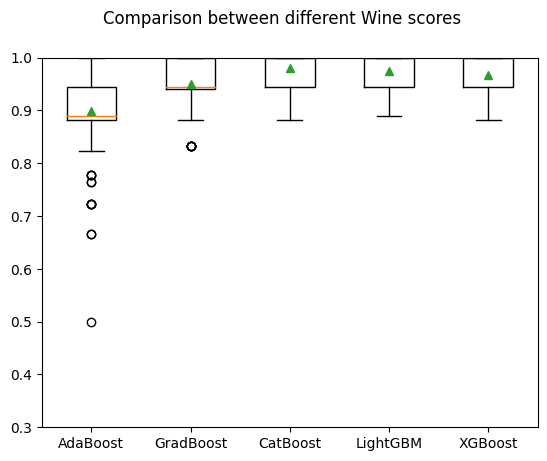

In [26]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Wine scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(wine_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [27]:
Algo_results = pd.DataFrame()
Algo_results['Names'] = names

In [28]:
Algo_results['Wine'] = wine_scores_mean

In [29]:
Algo_results

,Names,Wine
0,AdaBoost,89.830065
1,GradBoost,95.071895
2,CatBoost,97.977124
3,LightGBM,97.421569
4,XGBoost,96.676471


In [31]:
Algo_results_std = pd.DataFrame()
Algo_results_std['Names'] = names

In [32]:
Algo_results_std['Wine'] = wine_scores_std

In [33]:
Algo_results_std

,Names,Wine
0,AdaBoost,8.935178
1,GradBoost,4.689441
2,CatBoost,3.231395
3,LightGBM,3.206245
4,XGBoost,4.235288


In [34]:
Algo_time_results = pd.DataFrame()
Algo_time_results['Names'] = names

In [35]:
Algo_time_results['Wine'] = pd.Series(execution_times)

In [36]:
Algo_time_results

,Names,Wine
0,AdaBoost,12.676296
1,GradBoost,35.455523
2,CatBoost,252.544651
3,LightGBM,3.015574
4,XGBoost,3.691690


---

# **(Unbalanced) Breast Cancer Dataset**

---

In [37]:
breast_cancer_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/BreastCancer/Breast.dat', sep=',', header=None)

In [38]:
breast_cancer_df.head()

,0,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [39]:
print(breast_cancer_df.shape)

(683, 10)


In [40]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       683 non-null    int64
 1   1       683 non-null    int64
 2   2       683 non-null    int64
 3   3       683 non-null    int64
 4   4       683 non-null    int64
 5   5       683 non-null    int64
 6   6       683 non-null    int64
 7   7       683 non-null    int64
 8   8       683 non-null    int64
 9   9       683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


In [41]:
breast_cancer_df.nunique()

0    10
1    10
2    10
3    10
4    10
5    10
6    10
7    10
8     9
9     2
dtype: int64

In [42]:
# Unbalanced dataset

breast_cancer_df[9].value_counts()

2    444
4    239
Name: 9, dtype: int64

In [43]:
breast_cancer_df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [44]:
X = breast_cancer_df.iloc[:, :-1]
y = breast_cancer_df.iloc[:, -1]

In [45]:
X.head()

,0,1,2,3,4,5,6,7,8
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [46]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: 9, dtype: int64

In [47]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [48]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [49]:
breast_cancer_scores = []
breast_cancer_mean = []
breast_cancer_std = []
model_names = []
execution_times = []

for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  breast_cancer_scores.append(results)
  breast_cancer_mean.append(results.mean()*100)
  breast_cancer_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Breast Cancer Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Breast Cancer Dataset ---------
[0.98550725 0.97101449 0.97101449 0.92647059 0.92647059 0.95588235
 0.92647059 0.98529412 0.94117647 1.         0.95652174 0.95652174
 0.95652174 0.97058824 0.95588235 0.95588235 0.95588235 0.92647059
 0.98529412 0.97058824 0.97101449 0.97101449 0.89855072 0.98529412
 1.         0.94117647 0.95588235 0.94117647 0.97058824 0.97058824
 0.98550725 0.88405797 0.94202899 0.98529412 1.         0.95588235
 1.         0.92647059 0.97058824 0.95588235 1.         0.89855072
 0.92753623 0.95588235 0.94117647 0.94117647 1.         0.91176471
 0.98529412 0.98529412 0.97101449 0.95652174 0.95652174 0.95588235
 0.97058824 0.92647059 0.91176471 0.97058824 1.         0.92647059
 0.94202899 0.94202899 0.98550725 0.92647059 0.97058824 0.98529412
 0.97058824 0.98529412 0.95588235 0.95588235 0.97101449 0.97101449
 0.94202899 0.94117647 0.97058824 0.98529412 0.94117647 0.98529412
 0.92647059 0.95588235 0.95652174 0.92753623 0.91304348 0.94117647
 0.95588

In [50]:
breast_cancer_mean

[95.8005115089514,
 96.51577152600169,
 97.08716965046888,
 96.63299232736571,
 96.42902813299233]

In [51]:
breast_cancer_std

[2.5424281877731705,
 2.515754192531237,
 2.2230461706335842,
 2.373965102772195,
 2.256038579109944]

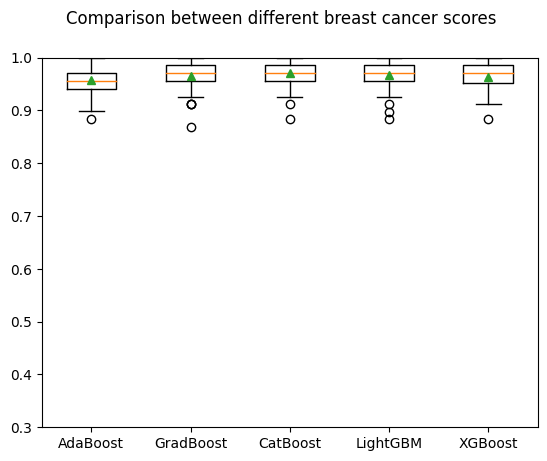

In [52]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different breast cancer scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(breast_cancer_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [53]:
Algo_results['Breast_Cancer'] = breast_cancer_mean

In [54]:
Algo_results

,Names,Wine,Breast_Cancer
0,AdaBoost,89.830065,95.800512
1,GradBoost,95.071895,96.515772
2,CatBoost,97.977124,97.087170
3,LightGBM,97.421569,96.632992
4,XGBoost,96.676471,96.429028


In [200]:
Algo_results_std['Breast_Cancer'] = breast_cancer_std

In [58]:
Algo_time_results['Breast_Cancer'] = pd.Series(execution_times)

---

# **(Unbalanced) Sonar Dataset** #

---

In [59]:
sonar_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Sonar/Sonar.csv', header=None)

In [60]:
sonar_df.shape

(208, 61)

In [61]:
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [62]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [63]:
# A little unbalanced dataset

sonar_df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [64]:
X = sonar_df.iloc[:, :-1]
y = sonar_df.iloc[:, -1]

In [65]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [66]:
y.head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [67]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [68]:
sonar_scores = []
sonar_mean = []
sonar_std = []
model_names = []
execution_times = []


for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  sonar_scores.append(results)
  sonar_mean.append(results.mean()*100)
  sonar_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Sonar Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Sonar Dataset ---------
[0.9047619  0.76190476 0.76190476 0.76190476 0.85714286 0.80952381
 0.9047619  0.85714286 0.9        0.8        0.80952381 0.85714286
 0.57142857 0.76190476 0.80952381 0.80952381 0.85714286 0.80952381
 0.75       0.85       0.9047619  0.85714286 0.9047619  0.76190476
 0.85714286 0.85714286 0.85714286 0.80952381 0.8        0.9
 0.76190476 0.85714286 0.80952381 0.9047619  0.85714286 0.80952381
 0.76190476 0.71428571 0.75       0.95       0.76190476 0.80952381
 0.76190476 0.95238095 0.9047619  0.80952381 0.95238095 0.85714286
 0.8        0.8        0.9047619  0.9047619  0.9047619  0.66666667
 0.76190476 0.80952381 0.9047619  0.85714286 0.9        0.95
 0.9047619  0.85714286 0.85714286 0.9047619  0.9047619  0.80952381
 0.85714286 0.76190476 0.85       0.7        0.66666667 0.95238095
 0.80952381 0.66666667 0.76190476 0.9047619  0.71428571 0.9047619
 1.         0.95       0.61904762 0.9047619  0.85714286 0.9047619
 0.80952381 0.85714286 0.714285

In [69]:
sonar_mean

[83.14047619047616,
 84.1857142857143,
 87.15238095238097,
 88.12380952380954,
 85.00714285714285]

In [70]:
sonar_std

[7.844412125028975,
 8.340077543046963,
 8.016770969663867,
 7.246883762213835,
 8.24734238785956]

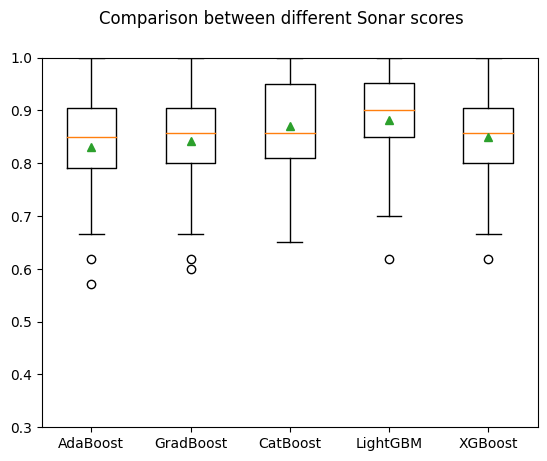

In [71]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Sonar scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(sonar_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [72]:
Algo_results['Sonar'] = sonar_mean

In [73]:
Algo_results

,Names,Wine,Breast_Cancer,Sonar
0,AdaBoost,89.830065,95.800512,83.140476
1,GradBoost,95.071895,96.515772,84.185714
2,CatBoost,97.977124,97.087170,87.152381
3,LightGBM,97.421569,96.632992,88.123810
4,XGBoost,96.676471,96.429028,85.007143


In [74]:
Algo_results_std['Sonar'] = sonar_std

In [75]:
Algo_time_results['Sonar'] = pd.Series(execution_times)

---

# **(Unbalanced) Ionosphere Dataset**

---

In [76]:
ionosphere_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Ionosphere/ionosphere.data', header=None)

In [77]:
ionosphere_df.shape

(351, 35)

In [78]:
ionosphere_df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [79]:
ionosphere_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

In [80]:
ionosphere_df.nunique()

0       2
1       1
2     219
3     269
4     204
5     259
6     231
7     260
8     244
9     267
10    246
11    269
12    238
13    266
14    234
15    270
16    254
17    280
18    254
19    266
20    248
21    265
22    248
23    264
24    256
25    273
26    256
27    281
28    244
29    266
30    243
31    263
32    245
33    263
34      2
dtype: int64

In [81]:
ionosphere_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

In [82]:
# This is a unbalanced dataset

ionosphere_df[34].value_counts()

g    225
b    126
Name: 34, dtype: int64

In [83]:
X = ionosphere_df.iloc[:, :-1]
y = ionosphere_df.iloc[:, -1]

In [84]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [85]:
y.head()

0    g
1    b
2    g
3    b
4    g
Name: 34, dtype: object

In [86]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [87]:
ionosphere_scores = []
ionosphere_mean = []
ionosphere_std = []
model_names = []
execution_times = []

for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  ionosphere_scores.append(results)
  ionosphere_mean.append(results.mean()*100)
  ionosphere_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Ionosphere Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Ionosphere Dataset ---------
[0.88888889 0.91428571 0.97142857 0.91428571 0.97142857 0.94285714
 0.94285714 1.         0.88571429 0.94285714 0.88888889 0.85714286
 0.97142857 1.         0.97142857 0.94285714 0.94285714 0.94285714
 0.85714286 0.91428571 0.94444444 0.97142857 0.88571429 0.88571429
 0.97142857 0.97142857 0.91428571 0.94285714 0.91428571 0.94285714
 0.91666667 0.94285714 0.97142857 0.88571429 0.85714286 0.94285714
 1.         0.97142857 0.88571429 0.97142857 0.91666667 0.97142857
 0.97142857 0.85714286 0.85714286 0.91428571 0.94285714 0.97142857
 0.97142857 0.97142857 0.91666667 0.91428571 0.94285714 1.
 0.97142857 0.91428571 0.94285714 0.85714286 0.97142857 0.88571429
 0.86111111 0.91428571 0.94285714 0.88571429 0.91428571 0.91428571
 0.91428571 1.         1.         0.91428571 0.80555556 1.
 0.97142857 0.85714286 0.94285714 0.91428571 0.97142857 0.85714286
 1.         0.91428571 0.97222222 0.97142857 0.88571429 0.91428571
 0.85714286 0.94285714 0.94

In [88]:
ionosphere_mean

[93.02777777777777,
 93.05555555555556,
 93.4531746031746,
 93.7063492063492,
 92.43015873015872]

In [89]:
ionosphere_std

[4.4762520399909125,
 4.859171948822011,
 4.589216591001476,
 4.414603619768994,
 5.314317716237489]

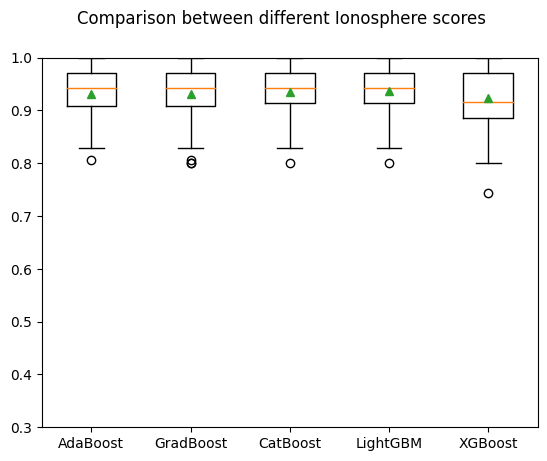

In [90]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Ionosphere scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(ionosphere_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [91]:
Algo_results['Ionosphere'] = ionosphere_mean

In [92]:
Algo_results

,Names,Wine,Breast_Cancer,Sonar,Ionosphere
0,AdaBoost,89.830065,95.800512,83.140476,93.027778
1,GradBoost,95.071895,96.515772,84.185714,93.055556
2,CatBoost,97.977124,97.087170,87.152381,93.453175
3,LightGBM,97.421569,96.632992,88.123810,93.706349
4,XGBoost,96.676471,96.429028,85.007143,92.430159


In [93]:
Algo_results_std['Ionosphere'] = ionosphere_std

In [94]:
Algo_time_results['Ionosphere'] = pd.Series(execution_times)

---

# **(Unbalanced) Bupa**

---

In [95]:
bupa_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Bupa/Bupa.data', header=None)

In [96]:
bupa_df.shape

(345, 7)

In [97]:
bupa_df.head()

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [98]:
bupa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       345 non-null    int64  
 1   1       345 non-null    int64  
 2   2       345 non-null    int64  
 3   3       345 non-null    int64  
 4   4       345 non-null    int64  
 5   5       345 non-null    float64
 6   6       345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [99]:
bupa_df.nunique()

0    26
1    78
2    67
3    47
4    94
5    16
6     2
dtype: int64

In [100]:
bupa_df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [101]:
# Unbalanced dataset

bupa_df[6].value_counts()

2    200
1    145
Name: 6, dtype: int64

In [102]:
X = bupa_df.iloc[:, :-1]
y = bupa_df.iloc[:, -1]

In [103]:
X.head()

,0,1,2,3,4,5
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


In [104]:
y.head()

0    1
1    2
2    2
3    2
4    2
Name: 6, dtype: int64

In [105]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [106]:
bupa_scores = []
bupa_mean = []
bupa_std = []
model_names = []
execution_times = []

for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  bupa_scores.append(results)
  bupa_mean.append(results.mean()*100)
  bupa_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Bupa Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Bupa Dataset ---------
[0.8        0.8        0.65714286 0.74285714 0.71428571 0.64705882
 0.67647059 0.79411765 0.70588235 0.64705882 0.71428571 0.77142857
 0.71428571 0.65714286 0.65714286 0.79411765 0.55882353 0.76470588
 0.70588235 0.82352941 0.74285714 0.62857143 0.71428571 0.74285714
 0.68571429 0.73529412 0.79411765 0.82352941 0.82352941 0.58823529
 0.62857143 0.74285714 0.8        0.62857143 0.71428571 0.79411765
 0.70588235 0.67647059 0.67647059 0.55882353 0.74285714 0.77142857
 0.74285714 0.71428571 0.77142857 0.79411765 0.70588235 0.73529412
 0.73529412 0.70588235 0.68571429 0.8        0.62857143 0.82857143
 0.71428571 0.67647059 0.64705882 0.70588235 0.85294118 0.73529412
 0.62857143 0.62857143 0.77142857 0.68571429 0.8        0.61764706
 0.61764706 0.85294118 0.76470588 0.76470588 0.71428571 0.68571429
 0.82857143 0.74285714 0.71428571 0.76470588 0.70588235 0.85294118
 0.61764706 0.70588235 0.88571429 0.6        0.74285714 0.71428571
 0.74285714 0.735

In [107]:
bupa_mean

[72.25462184873949,
 72.4109243697479,
 74.40336134453781,
 71.8016806722689,
 70.57983193277309]

In [108]:
bupa_std

[7.026728304847883,
 6.671651803480113,
 6.450640429588332,
 6.215299205426823,
 6.773062326505143]

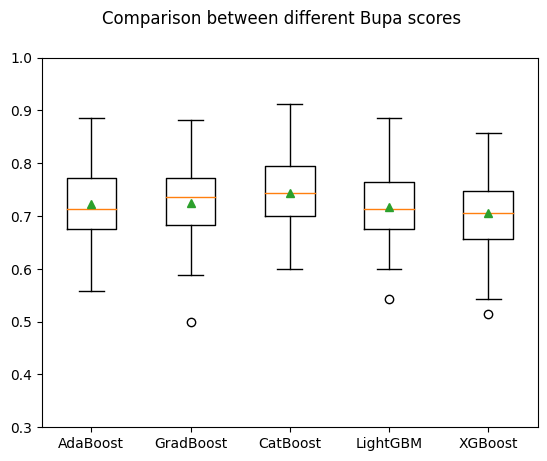

In [109]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Bupa scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(bupa_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [110]:
Algo_results['Bupa'] = bupa_mean

In [111]:
Algo_results

,Names,Wine,Breast_Cancer,Sonar,Ionosphere,Bupa
0,AdaBoost,89.830065,95.800512,83.140476,93.027778,72.254622
1,GradBoost,95.071895,96.515772,84.185714,93.055556,72.410924
2,CatBoost,97.977124,97.087170,87.152381,93.453175,74.403361
3,LightGBM,97.421569,96.632992,88.123810,93.706349,71.801681
4,XGBoost,96.676471,96.429028,85.007143,92.430159,70.579832


In [112]:
Algo_results_std['Bupa'] = bupa_std

In [113]:
Algo_time_results['Bupa'] = pd.Series(execution_times)

---

# **(Unbalanced) Pima**

---

In [114]:
pima_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Pima/Diabetes.csv')

In [115]:
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
pima_df.shape

(768, 9)

In [117]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
pima_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
pima_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [120]:
# It is a unbalanced dataset

pima_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [121]:
X = pima_df.iloc[:, :-1]
y = pima_df.iloc[:, -1]

In [122]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [123]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [124]:
pima_scores = []
pima_mean = []
pima_std = []
model_names = []
execution_times = []

for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  pima_scores.append(results)
  pima_mean.append(results.mean()*100)
  pima_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Pima Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Pima Dataset ---------
[0.75324675 0.77922078 0.71428571 0.76623377 0.80519481 0.7012987
 0.80519481 0.74025974 0.67105263 0.84210526 0.79220779 0.76623377
 0.76623377 0.83116883 0.76623377 0.71428571 0.67532468 0.75324675
 0.69736842 0.71052632 0.72727273 0.79220779 0.77922078 0.77922078
 0.67532468 0.68831169 0.7012987  0.87012987 0.77631579 0.82894737
 0.71428571 0.76623377 0.81818182 0.67532468 0.68831169 0.75324675
 0.74025974 0.75324675 0.71052632 0.81578947 0.76623377 0.74025974
 0.77922078 0.67532468 0.75324675 0.68831169 0.75324675 0.72727273
 0.77631579 0.77631579 0.75324675 0.76623377 0.75324675 0.72727273
 0.72727273 0.72727273 0.75324675 0.76623377 0.77631579 0.73684211
 0.72727273 0.75324675 0.64935065 0.83116883 0.71428571 0.80519481
 0.75324675 0.67532468 0.73684211 0.84210526 0.79220779 0.67532468
 0.72727273 0.79220779 0.74025974 0.81818182 0.7012987  0.77922078
 0.71052632 0.78947368 0.76623377 0.79220779 0.87012987 0.80519481
 0.66233766 0.6883

In [125]:
pima_mean

[75.11859193438143,
 76.18386876281612,
 76.24931647300069,
 73.98513328776488,
 73.84244702665757]

In [126]:
pima_std

[5.077770573084834,
 4.805911871661041,
 4.987577768282925,
 5.301428805296274,
 4.741009133635159]

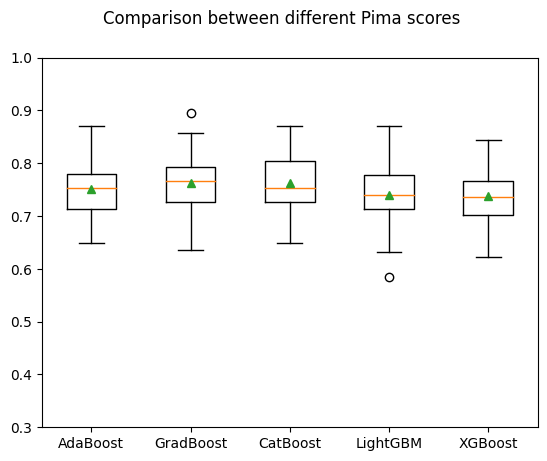

In [127]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Pima scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(pima_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [128]:
Algo_results['Pima'] = pima_mean

In [129]:
Algo_results_std['Pima'] = pima_std

In [130]:
Algo_time_results['Pima'] = pd.Series(execution_times)

---

# **(Unbalanced) Heart**

---

In [131]:
heart_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Heart/Heart.csv')

In [132]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [133]:
heart_df.shape

(270, 14)

In [134]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    float64
 1   sex       270 non-null    float64
 2   cp        270 non-null    float64
 3   trestbps  270 non-null    float64
 4   chol      270 non-null    float64
 5   fbs       270 non-null    float64
 6   restecg   270 non-null    float64
 7   thalach   270 non-null    float64
 8   exang     270 non-null    float64
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    float64
 11  ca        270 non-null    float64
 12  thal      270 non-null    float64
 13  presence  270 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 29.7 KB


In [135]:
heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

In [136]:
# Almost balanced dataset

heart_df['presence'].value_counts()

1    150
2    120
Name: presence, dtype: int64

In [137]:
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]

In [138]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0


In [139]:
y.head()

0    2
1    1
2    2
3    1
4    1
Name: presence, dtype: int64

In [140]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [141]:
y

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [142]:
heart_scores = []
heart_mean = []
heart_std = []
model_names = []
execution_times = []

for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  heart_scores.append(results)
  heart_mean.append(results.mean()*100)
  heart_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Heart Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Heart Dataset ---------
[0.77777778 0.88888889 0.77777778 0.77777778 0.74074074 0.77777778
 0.77777778 0.81481481 0.81481481 0.7037037  0.77777778 0.92592593
 0.81481481 0.77777778 0.74074074 0.74074074 0.74074074 0.81481481
 0.85185185 0.85185185 0.74074074 0.74074074 0.7037037  0.7037037
 0.85185185 0.77777778 0.74074074 0.81481481 0.85185185 0.85185185
 0.81481481 0.7037037  0.81481481 0.81481481 0.88888889 0.74074074
 0.81481481 0.77777778 0.81481481 0.81481481 0.7037037  0.77777778
 0.81481481 0.88888889 0.74074074 0.77777778 0.77777778 0.88888889
 0.88888889 0.88888889 0.85185185 0.66666667 0.77777778 0.81481481
 0.74074074 0.81481481 0.77777778 0.81481481 0.88888889 0.81481481
 0.77777778 0.92592593 0.85185185 0.81481481 0.81481481 0.77777778
 0.77777778 0.92592593 0.77777778 0.66666667 0.88888889 0.81481481
 0.85185185 0.66666667 0.81481481 0.81481481 0.88888889 0.77777778
 0.77777778 0.81481481 0.81481481 0.7037037  0.81481481 0.85185185
 0.81481481 0.740

In [143]:
heart_mean

[79.8148148148148,
 80.07407407407408,
 81.88888888888887,
 80.88888888888889,
 80.37037037037035]

In [144]:
heart_std

[6.1391053534262126,
 7.177544620300597,
 6.807060806071759,
 7.252453347732925,
 6.594256968431428]

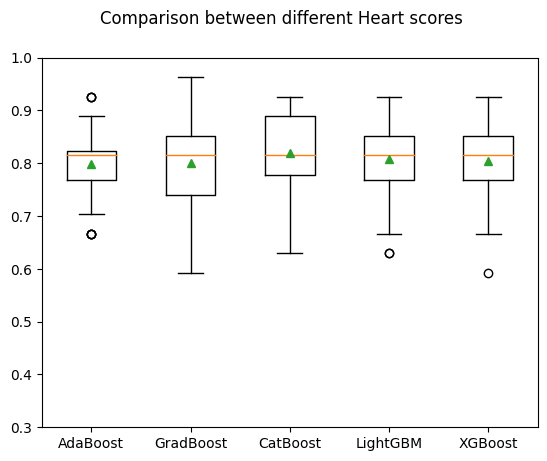

In [145]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Heart scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(heart_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [146]:
Algo_results['Heart'] = heart_mean

In [147]:
Algo_results_std['Heart'] = heart_std

In [148]:
Algo_time_results['Heart'] = pd.Series(execution_times)

---

# **(Unbalanced) Tic-Tac-Toe**

---

In [149]:
tictactoe_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/TicTacToe/TicTacToe.data', header=None)

In [150]:
tictactoe_df.head()

,0,1,2,3,4,5,6,7,8,9
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [151]:
X = tictactoe_df.iloc[:, :-1]
y = tictactoe_df.iloc[:, -1]

In [152]:
dummies = {
            'x': 0,
            'o': 1,
            'b': 2,
          }
Xdummies = X.iloc[:, 0: 9].replace(dummies)

In [153]:
X = X.iloc[:, 0:9].astype('category')

In [154]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       958 non-null    category
 1   1       958 non-null    category
 2   2       958 non-null    category
 3   3       958 non-null    category
 4   4       958 non-null    category
 5   5       958 non-null    category
 6   6       958 non-null    category
 7   7       958 non-null    category
 8   8       958 non-null    category
dtypes: category(9)
memory usage: 9.7 KB


In [155]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [156]:
d_names = [
          'AdaBoost',
          'GradBoost',
          ]
c_names =   [
          'CatBoost',
          'LightGBM',
          'XGBoost'
          ]

classi1 = [
            AdaBoostClassifier(),
            GradientBoostingClassifier()
          ]

classi2 = [
            CatBoostClassifier(cat_features=list(X.columns), silent=True),
            LGBMClassifier(categorical_feature=list(X.columns), feature_name=list(X.columns), verbosity=-1),
            XGBClassifier(enable_categorical=True, tree_method='hist')
          ]

In [157]:
warnings.filterwarnings("ignore", category=UserWarning)

tictactoe_scores = []
tictactoe_scores_mean = []
tictactoe_scores_std = []
model_names = []
execution_times = []

for name, clf in zip(d_names, classi1):
  start_time = time.time()
  results = cross_val_score(clf, Xdummies, y, cv=rkf)
  end_time = time.time()
  tictactoe_scores.append(results)
  tictactoe_scores_mean.append(results.mean()*100)
  tictactoe_scores_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Tictactoe Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

for name, clf in zip(c_names, classi2):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()
  tictactoe_scores.append(results)
  tictactoe_scores_mean.append(results.mean()*100)
  tictactoe_scores_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Tictactoe Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Tictactoe Dataset ---------
[0.73958333 0.8125     0.69791667 0.8125     0.82291667 0.82291667
 0.72916667 0.6875     0.76842105 0.77894737 0.875      0.69791667
 0.84375    0.78125    0.8125     0.6875     0.76041667 0.77083333
 0.72631579 0.83157895 0.82291667 0.75       0.70833333 0.72916667
 0.70833333 0.75       0.77083333 0.82291667 0.81052632 0.78947368
 0.79166667 0.82291667 0.71875    0.75       0.83333333 0.64583333
 0.80208333 0.79166667 0.75789474 0.81052632 0.77083333 0.76041667
 0.80208333 0.84375    0.72916667 0.80208333 0.83333333 0.6875
 0.77894737 0.76842105 0.77083333 0.77083333 0.75       0.76041667
 0.73958333 0.75       0.78125    0.82291667 0.8        0.84210526
 0.80208333 0.66666667 0.67708333 0.80208333 0.80208333 0.78125
 0.77083333 0.80208333 0.75789474 0.8        0.82291667 0.80208333
 0.75       0.78125    0.8125     0.79166667 0.76041667 0.79166667
 0.8        0.75789474 0.71875    0.75       0.77083333 0.79166667
 0.77083333 0.76041

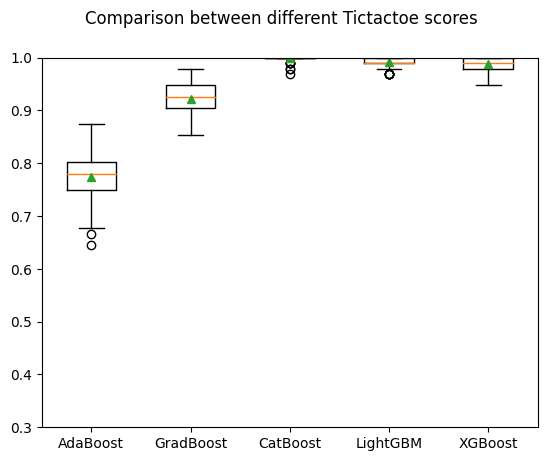

In [158]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Tictactoe scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(tictactoe_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [159]:
Algo_results['TicTacToe'] = tictactoe_scores_mean

In [160]:
Algo_results_std['TicTacToe'] = tictactoe_scores_std

In [161]:
Algo_time_results['TicTacToe'] = pd.Series(execution_times)

---

# **(Unbalanced) Liver**

---

In [162]:
liver_df = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Liver/bupa.data', header=None)

In [163]:
liver_df.shape

(345, 7)

In [164]:
liver_df.head()

,0,1,2,3,4,5,6
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,2
2,86,54,33,16,54,0.0,2
3,91,78,34,24,36,0.0,2
4,87,70,12,28,10,0.0,2


In [165]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       345 non-null    int64  
 1   1       345 non-null    int64  
 2   2       345 non-null    int64  
 3   3       345 non-null    int64  
 4   4       345 non-null    int64  
 5   5       345 non-null    float64
 6   6       345 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 19.0 KB


In [166]:
liver_df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [167]:
# Unbalanced dataset

liver_df[6].value_counts()

2    200
1    145
Name: 6, dtype: int64

In [168]:
X = liver_df.iloc[:, :-1]
y = liver_df.iloc[:, -1]

In [169]:
X.head()

,0,1,2,3,4,5
0,85,92,45,27,31,0.0
1,85,64,59,32,23,0.0
2,86,54,33,16,54,0.0
3,91,78,34,24,36,0.0
4,87,70,12,28,10,0.0


In [170]:
y.head()

0    1
1    2
2    2
3    2
4    2
Name: 6, dtype: int64

In [171]:
# Since version 1.3.2 XGBoost needs target columns to start with 0 value

le = LabelEncoder()
y = le.fit_transform(y)

In [172]:
y

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [173]:
liver_scores = []
liver_mean = []
liver_std = []
model_names = []
execution_times = []

for name, clf in zip(names, classifiers):
  start_time = time.time()
  results = cross_val_score(clf, X, y, cv=rkf)
  end_time = time.time()

  liver_scores.append(results)
  liver_mean.append(results.mean()*100)
  liver_std.append(results.std()*100)
  model_names.append(name)
  execution_time = end_time - start_time
  execution_times.append(execution_time)

  print(f'--------- {name} on Liver Dataset ---------')
  print(results)
  print('Accuracy: %.2f%% (%.2f%%)' % (results.mean()*100, results.std()*100))
  print(f'Execution Time: {execution_time:.2f} seconds')
  print('------------------------------')

--------- AdaBoost on Liver Dataset ---------
[0.8        0.8        0.65714286 0.74285714 0.71428571 0.64705882
 0.67647059 0.79411765 0.70588235 0.64705882 0.71428571 0.77142857
 0.71428571 0.65714286 0.65714286 0.79411765 0.55882353 0.76470588
 0.70588235 0.82352941 0.74285714 0.62857143 0.71428571 0.74285714
 0.68571429 0.73529412 0.79411765 0.82352941 0.82352941 0.58823529
 0.62857143 0.74285714 0.8        0.62857143 0.71428571 0.79411765
 0.70588235 0.67647059 0.67647059 0.55882353 0.74285714 0.77142857
 0.74285714 0.71428571 0.77142857 0.79411765 0.70588235 0.73529412
 0.73529412 0.70588235 0.68571429 0.8        0.62857143 0.82857143
 0.71428571 0.67647059 0.64705882 0.70588235 0.85294118 0.73529412
 0.62857143 0.62857143 0.77142857 0.68571429 0.8        0.61764706
 0.61764706 0.85294118 0.76470588 0.76470588 0.71428571 0.68571429
 0.82857143 0.74285714 0.71428571 0.76470588 0.70588235 0.85294118
 0.61764706 0.70588235 0.88571429 0.6        0.74285714 0.71428571
 0.74285714 0.73

In [174]:
liver_mean

[72.25462184873949,
 72.29327731092437,
 74.40336134453781,
 71.8016806722689,
 70.57983193277309]

In [175]:
liver_std

[7.026728304847883,
 6.574579560055363,
 6.450640429588332,
 6.215299205426823,
 6.773062326505143]

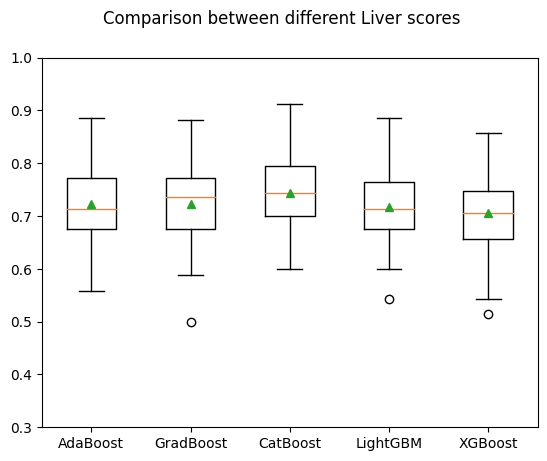

In [176]:
# algorithm comparison

fig = plt.figure()
fig.suptitle('Comparison between different Liver scores')
ax = fig.add_subplot(111)
plt.ylim(0.3, 1)
plt.boxplot(liver_scores, showmeans=True)
ax.set_xticklabels(model_names)
plt.show()

In [177]:
Algo_results['Liver'] = liver_mean

In [256]:
Algo_results

,Names,Wine,Breast_Cancer,Sonar,Ionosphere,Bupa,Pima,Heart,TicTacToe,Liver
0,AdaBoost,89.830065,95.800512,83.140476,93.027778,72.254622,75.118592,79.814815,77.381469,72.254622
1,GradBoost,95.071895,96.515772,84.185714,93.055556,72.410924,76.183869,80.074074,92.109430,72.293277
2,CatBoost,97.977124,97.087170,87.152381,93.453175,74.403361,76.249316,81.888889,99.884868,74.403361
3,LightGBM,97.421569,96.632992,88.123810,93.706349,71.801681,73.985133,80.888889,99.112719,71.801681
4,XGBoost,96.676471,96.429028,85.007143,92.430159,70.579832,73.842447,80.370370,98.810307,70.579832


In [257]:
Algo_results_tr = Algo_results.set_index('Names').T

In [258]:
Algo_results_tr.to_csv('/content/drive/MyDrive/DatasetSeminario/Algo_results/AlgoResults.csv', index=False)

In [259]:
Algo_results_tr

Names,AdaBoost,GradBoost,CatBoost,LightGBM,XGBoost
Wine,89.830065,95.071895,97.977124,97.421569,96.676471
Breast_Cancer,95.800512,96.515772,97.087170,96.632992,96.429028
Sonar,83.140476,84.185714,87.152381,88.123810,85.007143
Ionosphere,93.027778,93.055556,93.453175,93.706349,92.430159
Bupa,72.254622,72.410924,74.403361,71.801681,70.579832
Pima,75.118592,76.183869,76.249316,73.985133,73.842447
Heart,79.814815,80.074074,81.888889,80.888889,80.370370
TicTacToe,77.381469,92.109430,99.884868,99.112719,98.810307
Liver,72.254622,72.293277,74.403361,71.801681,70.579832


In [182]:
Algo_results_std['Liver'] = liver_std

In [183]:
Algo_results_std

,Names,Wine,Breast_Cancer,Sonar,Ionosphere,Bupa,Pima,Heart,TicTacToe,Liver
0,AdaBoost,8.935178,2.542428,7.844412,4.476252,7.026728,5.077771,6.139105,4.415847,7.026728
1,GradBoost,4.689441,2.515754,8.340078,4.859172,6.671652,4.805912,7.177545,3.069869,6.574580
2,CatBoost,3.231395,2.223046,8.016771,4.589217,6.450640,4.987578,6.807061,0.464991,6.450640
3,LightGBM,3.206245,2.373965,7.246884,4.414604,6.215299,5.301429,7.252453,0.914159,6.215299
4,XGBoost,4.235288,2.256039,8.247342,5.314318,6.773062,4.741009,6.594257,1.103353,6.773062


In [184]:
Algo_results_std_tr = Algo_results_std.set_index('Names').T

In [235]:
Algo_results_std_tr.to_csv('/content/drive/MyDrive/DatasetSeminario/Algo_results/AlgoResultsStd.csv', index=False)

In [186]:
Algo_time_results['Liver'] = pd.Series(execution_times)

In [223]:
Algo_time_results

,Names,Wine,Breast_Cancer,Sonar,Ionosphere,Bupa,Pima,Heart,TicTacToe,Liver
0,AdaBoost,12.676296,8.138952,12.050752,11.089048,7.651754,9.096246,7.598711,8.260242,7.612116
1,GradBoost,35.455523,14.576946,27.724694,23.873473,7.717140,14.597989,7.698237,9.802947,8.473189
2,CatBoost,252.544651,65.529124,745.911721,545.454163,71.475763,123.902024,79.368919,430.675700,70.586465
3,LightGBM,3.015574,2.534867,2.904376,5.442254,1.480027,3.410988,1.339058,3.518559,1.402952
4,XGBoost,3.691690,5.288792,8.706552,8.399888,3.574911,8.648128,3.369851,5.656618,5.488013


In [188]:
Algo_time_results_tr = Algo_results.set_index('Names').T

In [189]:
Algo_time_results_tr.to_csv('/content/drive/MyDrive/DatasetSeminario/Algo_results/AlgoTimeResults.csv', index=False)

---

# **Friedman's Test**

---

In [190]:
!pip install scikit-posthocs

In [191]:
import scikit_posthocs as sp
from scipy.stats import friedmanchisquare

In [260]:
Algo_results_tr = pd.read_csv('/content/drive/MyDrive/DatasetSeminario/Algo_results/AlgoResults.csv')

In [261]:
Algo_results_tr

,AdaBoost,GradBoost,CatBoost,LightGBM,XGBoost
0,89.830065,95.071895,97.977124,97.421569,96.676471
1,95.800512,96.515772,97.087170,96.632992,96.429028
2,83.140476,84.185714,87.152381,88.123810,85.007143
3,93.027778,93.055556,93.453175,93.706349,92.430159
4,72.254622,72.410924,74.403361,71.801681,70.579832
5,75.118592,76.183869,76.249316,73.985133,73.842447
6,79.814815,80.074074,81.888889,80.888889,80.370370
7,77.381469,92.109430,99.884868,99.112719,98.810307
8,72.254622,72.293277,74.403361,71.801681,70.579832


In [194]:
stat, p_value = friedmanchisquare(Algo_results_tr['AdaBoost'], Algo_results_tr['GradBoost'], Algo_results_tr['CatBoost'], Algo_results_tr['LightGBM'], Algo_results_tr['XGBoost'])

In [195]:
p_value

0.00025070600166248206

In [196]:
alpha = 0.05
if p_value < alpha:
    print('There are significant differences among the models.')
else:
    print('There are no significant differences among the models.')

There are significant differences among the models.


---

# **Nemenyi test**

---

In [197]:
nemenyi_results = sp.posthoc_nemenyi_friedman(a=Algo_results_tr)

In [198]:
nemenyi_results

,AdaBoost,GradBoost,CatBoost,LightGBM,XGBoost
AdaBoost,1.000000,0.559331,0.001000,0.119516,0.900000
GradBoost,0.559331,1.000000,0.083366,0.897740,0.728536
CatBoost,0.001000,0.083366,1.000000,0.472825,0.001816
LightGBM,0.119516,0.897740,0.472825,1.000000,0.225673
XGBoost,0.900000,0.728536,0.001816,0.225673,1.000000


In [199]:
alpha = 0.05

# Print p-values for all pairs of models
for i in range(nemenyi_results.shape[0]):
    for j in range(i + 1, nemenyi_results.shape[1]):
        model1 = i + 1
        model2 = j + 1
        p_value = nemenyi_results.iloc[i, j]

        if p_value < alpha:
            print(f"Models {model1} and {model2} are significantly different (p-value = {p_value:.4f}).")
        else:
            print(f"Models {model1} and {model2} are not significantly different (p-value = {p_value:.4f}).")

Models 1 and 2 are not significantly different (p-value = 0.5593).
Models 1 and 3 are significantly different (p-value = 0.0010).
Models 1 and 4 are not significantly different (p-value = 0.1195).
Models 1 and 5 are not significantly different (p-value = 0.9000).
Models 2 and 3 are not significantly different (p-value = 0.0834).
Models 2 and 4 are not significantly different (p-value = 0.8977).
Models 2 and 5 are not significantly different (p-value = 0.7285).
Models 3 and 4 are not significantly different (p-value = 0.4728).
Models 3 and 5 are significantly different (p-value = 0.0018).
Models 4 and 5 are not significantly different (p-value = 0.2257).
